In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt              
import seaborn as sns                   

In [2]:
pd.set_option('display.max_columns', None)
np.set_printoptions(suppress=True)  
df=pd.read_csv("E:/Study/ML tuts/Case Studies/fifa/players_20_classification.csv")
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,player_tags,player_traits,player_positions,player_type,team_jersey_number,nation_jersey_number,pace,shooting,passing,dribbling,defending,physique,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,overall
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-85,187,83,Portugal,Juventus,Right,5,4,5,High/Low,Lean,"#Speedster, #Dribbler, #Distance Shooter, #Acr...","Long Throw-in, Selfish, Argues with Officials,...",ST,Attacker,7.0,7.0,90,93,82,89,35,78,7,11,15,11,89,14,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,93
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-87,170,72,Argentina,FC Barcelona,Left,5,4,4,Medium/Low,Normal,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...","Beat Offside Trap, Argues with Officials, Earl...",RW,Attacker,10.0,NaN,87,92,92,96,39,66,6,11,15,8,91,14,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,94
2,202126,https://sofifa.com/player/202126/harry-kane/20...,H. Kane,Harry Kane,25,28-07-93,188,89,England,Tottenham Hotspur,Right,3,4,3,High/High,Normal,"#Engine, #Distance Shooter, #Clinical Finisher","Injury Free, Avoids Using Weaker Foot, Argues ...",ST,Attacker,10.0,9.0,70,91,79,81,47,83,8,10,11,11,68,14,75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11,89
3,153079,https://sofifa.com/player/153079/sergio-aguero...,S. Agüero,Sergio Leonel Agüero del Castillo,31,02-06-88,173,70,Argentina,Manchester City,Right,4,4,4,High/Medium,Stocky,"#Dribbler, #Clinical Finisher, #Complete Forward","Avoids Using Weaker Foot, Outside Foot Shot",ST,Attacker,10.0,9.0,80,90,77,88,33,74,13,15,6,14,82,11,70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,13,15,6,11,14,89
4,176580,https://sofifa.com/player/176580/luis-suarez/2...,L. Suárez,Luis Alberto Suárez Díaz,32,24-01-87,182,86,Uruguay,FC Barcelona,Right,5,4,3,High/Medium,Normal,"#Distance Shooter, #Strength, #Clinical Finish...","Diver, Speed Dribbler (CPU AI Only)",ST,Attacker,9.0,NaN,73,89,80,84,51,84,27,25,31,37,76,33,78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,251365,https://sofifa.com/player/251365/patryk-krolcz...,P. Królczyk,Patryk Królczyk,25,10-05-94,188,81,Poland,Piast Gliwice,Right,1,1,1,Medium/Medium,Lean,NaN,NaN,GK,Goalkeeper,12.0,NaN,20,41,14,14,10,42,53,47,55,53,18,48,12,5,13,12,7,14,13,11,17,18,15,20,27,31,37,41,48,28,56,8,24,12,4,27,15,32,5,13,12,53,47,55,48,53,49
18274,252151,https://sofifa.com/player/252151/vegard-storsv...,V. Storsve,Vegard Storsve,17,25-01-02,185,65,Norway,Lillestrøm SK,Right,1,2,1,Medium/Medium,Lean,NaN,NaN,GK,Goalkeeper,41.0,NaN,31,36,17

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   player_url                  18278 non-null  object 
 2   short_name                  18278 non-null  object 
 3   long_name                   18278 non-null  object 
 4   age                         18278 non-null  int64  
 5   dob                         18278 non-null  object 
 6   height_cm                   18278 non-null  int64  
 7   weight_kg                   18278 non-null  int64  
 8   nationality                 18278 non-null  object 
 9   club                        18278 non-null  object 
 10  preferred_foot              18278 non-null  object 
 11  international_reputation    18278 non-null  int64  
 12  weak_foot                   18278 non-null  int64  
 13  skill_moves                 182

In [4]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,player_tags,player_traits,player_positions,player_type,team_jersey_number,nation_jersey_number,pace,shooting,passing,dribbling,defending,physique,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,overall
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-85,187,83,Portugal,Juventus,Right,5,4,5,High/Low,Lean,"#Speedster, #Dribbler, #Distance Shooter, #Acr...","Long Throw-in, Selfish, Argues with Officials,...",ST,Attacker,7.0,7.0,90,93,82,89,35,78,7,11,15,11,89,14,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,93
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-87,170,72,Argentina,FC Barcelona,Left,5,4,4,Medium/Low,Normal,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...","Beat Offside Trap, Argues with Officials, Earl...",RW,Attacker,10.0,NaN,87,92,92,96,39,66,6,11,15,8,91,14,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,94
2,202126,https://sofifa.com/player/202126/harry-kane/20...,H. Kane,Harry Kane,25,28-07-93,188,89,England,Tottenham Hotspur,Right,3,4,3,High/High,Normal,"#Engine, #Distance Shooter, #Clinical Finisher","Injury Free, Avoids Using Weaker Foot, Argues ...",ST,Attacker,10.0,9.0,70,91,79,81,47,83,8,10,11,11,68,14,75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11,89
3,153079,https://sofifa.com/player/153079/sergio-aguero...,S. Agüero,Sergio Leonel Agüero del Castillo,31,02-06-88,173,70,Argentina,Manchester City,Right,4,4,4,High/Medium,Stocky,"#Dribbler, #Clinical Finisher, #Complete Forward","Avoids Using Weaker Foot, Outside Foot Shot",ST,Attacker,10.0,9.0,80,90,77,88,33,74,13,15,6,14,82,11,70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,13,15,6,11,14,89
4,176580,https://sofifa.com/player/176580/luis-suarez/2...,L. Suárez,Luis Alberto Suárez Díaz,32,24-01-87,182,86,Uruguay,FC Barcelona,Right,5,4,3,High/Medium,Normal,"#Distance Shooter, #Strength, #Clinical Finish...","Diver, Speed Dribbler (CPU AI Only)",ST,Attacker,9.0,NaN,73,89,80,84,51,84,27,25,31,37,76,33,78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37,89


In [5]:
df.drop(
['sofifa_id',
'player_url',
'short_name',
'long_name',
'dob',
'preferred_foot',
'player_tags',
'player_traits',
'player_positions',
'nation_jersey_number',
'team_jersey_number',
'pace',         
'shooting',      
'passing',       
'dribbling',    
'defending',     
'physique',      
'gk_diving',     
'gk_handling',   
'gk_kicking',    
'gk_reflexes',   
'gk_speed',      
'gk_positioning',
'overall'
],axis=1,inplace=True)

In [6]:
df.head()

,age,height_cm,weight_kg,nationality,club,international_reputation,weak_foot,skill_moves,work_rate,body_type,player_type,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,34,187,83,Portugal,Juventus,5,4,5,High/Low,Lean,Attacker,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
1,32,170,72,Argentina,FC Barcelona,5,4,4,Medium/Low,Normal,Attacker,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
2,25,188,89,England,Tottenham Hotspur,3,4,3,High/High,Normal,Attacker,75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11
3,31,173,70,Argentina,Manchester City,4,4,4,High/Medium,Stocky,Attacker,70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,13,15,6,11,14
4,32,182,86,Uruguay,FC Barcelona,5,4,3,High/Medium,Normal,Attacker,78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37


In [7]:
df.shape

(18278, 45)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         18278 non-null  int64 
 1   height_cm                   18278 non-null  int64 
 2   weight_kg                   18278 non-null  int64 
 3   nationality                 18278 non-null  object
 4   club                        18278 non-null  object
 5   international_reputation    18278 non-null  int64 
 6   weak_foot                   18278 non-null  int64 
 7   skill_moves                 18278 non-null  int64 
 8   work_rate                   18278 non-null  object
 9   body_type                   18278 non-null  object
 10  player_type                 18278 non-null  object
 11  attacking_crossing          18278 non-null  int64 
 12  attacking_finishing         18278 non-null  int64 
 13  attacking_heading_accuracy  18278 non-null  in

In [9]:
df.nunique()

age                            27
height_cm                      49
weight_kg                      56
nationality                   162
club                          698
international_reputation        5
weak_foot                       5
skill_moves                     5
work_rate                       9
body_type                       3
player_type                     4
attacking_crossing             88
attacking_finishing            93
attacking_heading_accuracy     89
attacking_short_passing        84
attacking_volleys              87
skill_dribbling                92
skill_curve                    89
skill_fk_accuracy              89
skill_long_passing             85
skill_ball_control             90
movement_acceleration          86
movement_sprint_speed          86
movement_agility               83
movement_reactions             72
movement_balance               81
power_shot_power               80
power_jumping                  74
power_stamina                  86
power_strength

In [10]:
df["age"].unique()

array([34, 32, 25, 31, 36, 30, 37, 29, 27, 26, 28, 20, 33, 24, 21, 23, 22,
       38, 35, 19, 40, 18, 39, 16, 17, 42, 41], dtype=int64)

In [11]:
df["height_cm"].unique()

array([187, 170, 188, 173, 182, 180, 195, 185, 184, 175, 183, 176, 181,
       179, 177, 186, 178, 190, 193, 169, 189, 174, 171, 196, 191, 172,
       197, 163, 192, 168, 194, 165, 167, 198, 164, 166, 158, 203, 201,
       162, 160, 157, 161, 159, 200, 199, 156, 202, 205], dtype=int64)

In [12]:
df["weight_kg"].unique()

array([ 83,  72,  89,  70,  86,  79,  71,  95,  82,  80,  78,  73,  77,
        75,  68,  85,  92,  67,  69,  74,  61,  76,  81,  88,  94,  93,
        91,  65,  84,  64,  59,  63,  90,  87,  66,  62,  60,  96, 101,
        56,  98,  57,  58,  54,  52, 110,  55, 100,  97,  53,  99,  50,
       103, 102, 104, 107], dtype=int64)

In [13]:
df["nationality"].unique()

array(['Portugal', 'Argentina', 'England', 'Uruguay', 'Italy', 'Germany',
       'Sweden', 'Wales', 'Poland', 'Egypt', 'Korea Republic', 'France',
       'Belgium', 'Colombia', 'Gabon', 'Brazil', 'Croatia', 'Spain',
       'Slovenia', 'Bosnia Herzegovina', 'Senegal', 'Mexico', 'Serbia',
       'Netherlands', 'Ivory Coast', 'DR Congo', 'Russia', 'Turkey',
       'Israel', 'Denmark', 'FYR Macedonia', 'Iceland',
       'Dominican Republic', 'Ecuador', 'Tunisia', 'Austria', 'Ukraine',
       'Montenegro', 'Venezuela', 'Mali', 'Norway', 'Angola', 'Morocco',
       'Syria', 'Chile', 'Ghana', 'Paraguay', 'Kosovo', 'Tanzania',
       'Algeria', 'Cameroon', 'Jamaica', 'Slovakia', 'Switzerland',
       'Peru', 'Hungary', 'Zimbabwe', 'Armenia', 'New Zealand',
       'United States', 'Greece', 'Japan', 'Finland', 'Romania',
       'Bolivia', 'Nigeria', 'Costa Rica', 'China PR', 'Guinea',
       'Cape Verde', 'South Africa', 'Czech Republic', 'Scotland',
       'Bulgaria', 'Chad', 'Burkina Faso', '

In [14]:
print(df['nationality'].isnull().values.any()) 

False


In [15]:
df["club"].unique()

array(['Juventus', 'FC Barcelona', 'Tottenham Hotspur', 'Manchester City',
       'Sampdoria', 'Borussia Dortmund', 'LA Galaxy', 'Real Madrid',
       'FC Bayern München', 'Liverpool', 'Paris Saint-Germain', 'Arsenal',
       'Lazio', 'Shanghai SIPG FC', 'TSG 1899 Hoffenheim', 'Napoli',
       'Atlético Mineiro', 'RC Celta', 'Bayer 04 Leverkusen', 'Inter',
       'Atalanta', 'Roma', 'Sporting CP', 'Real Betis', 'Fenerbahçe SK',
       'Getafe CF', 'Manchester United', 'AS Monaco', 'Los Angeles FC',
       'Uruguay', 'Guangzhou Evergrande Taobao FC', 'Brescia',
       'Real Sociedad', 'Racing Club', 'Atlético Madrid', 'Al Hilal',
       'Tigres U.A.N.L.', 'Rangers FC', 'Athletic Club de Bilbao',
       'RB Leipzig', 'Beijing Sinobo Guoan FC', 'Levante UD',
       'Leicester City', 'Lokomotiv Moscow', 'Beşiktaş JK', 'Torino',
       'Borussia Mönchengladbach', 'Guangzhou R&F FC', 'Montreal Impact',
       'West Ham United', 'SL Benfica', 'FC Augsburg', 'Vissel Kobe',
       'DC United', 

In [16]:
print(df['club'].isnull().values.any()) 

False


In [17]:
df["international_reputation"].unique()

array([5, 3, 4, 2, 1], dtype=int64)

In [18]:
df["weak_foot"].unique()

array([4, 3, 5, 2, 1], dtype=int64)

In [19]:
df["skill_moves"].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [20]:
df["work_rate"].unique()

array(['High/Low', 'Medium/Low', 'High/High', 'High/Medium',
       'Medium/Medium', 'Medium/High', 'Low/Medium', 'Low/Low',
       'Low/High'], dtype=object)

In [21]:
df["body_type"].unique()

array(['Lean', 'Normal', 'Stocky'], dtype=object)

In [22]:
df["player_type"].unique()

array(['Attacker', 'Midfielder', 'Defender', 'Goalkeeper'], dtype=object)

In [23]:
df['attacking_crossing'].unique()

array([84, 88, 75, 70, 78, 66, 82, 86, 62, 79, 81, 83, 93, 90, 76, 87, 68,
       55, 58, 56, 53, 80, 46, 63, 74, 50, 49, 72, 67, 64, 65, 61, 54, 38,
       69, 57, 42, 60, 40, 44, 37, 71, 73, 51, 48, 59, 77, 41, 52, 91, 36,
       31, 29, 34, 85, 35, 33, 45, 39, 43, 89, 32, 47, 28, 30, 26, 25, 27,
       22, 23, 24, 21, 20, 18, 17, 19, 11, 15, 14, 16, 13, 12,  9, 10,  8,
        7,  6,  5], dtype=int64)

In [24]:
df['attacking_finishing'].unique()

array([94, 95, 93, 91, 89, 87, 86, 84, 88, 90, 82, 83, 81, 85, 77, 80, 75,
       79, 78, 76, 74, 73, 68, 72, 70, 71, 67, 65, 66, 69, 60, 64, 63, 62,
       61, 58, 59, 56, 55, 57, 54, 53, 51, 48, 52, 49, 50, 44, 47, 45, 43,
       46, 40, 42, 38, 41, 39, 37, 36, 35, 34, 26, 33, 31, 32, 27, 30, 25,
       20, 28, 29, 19, 22, 17, 24, 21, 23, 13, 18, 16, 15, 12, 14, 10, 11,
        8,  9,  6,  5,  7,  2,  3,  4], dtype=int64)

In [25]:
df['attacking_heading_accuracy'].unique()

array([89, 70, 86, 78, 83, 69, 49, 84, 85, 59, 65, 55, 62, 74, 81, 80, 77,
       88, 58, 61, 40, 82, 63, 72, 44, 64, 67, 79, 92, 93, 90, 57, 71, 73,
       75, 52, 54, 68, 60, 91, 53, 76, 48, 56, 66, 87, 38, 43, 50, 45, 51,
       34, 46, 47, 31, 29, 36, 41, 35, 33, 42, 32, 37, 39, 30, 22, 23, 27,
       26, 28, 24, 18, 20, 25, 19, 21, 12, 15, 11, 14, 13, 10, 16, 17,  8,
        7,  9,  5,  6], dtype=int64)

In [26]:
df['attacking_short_passing'].unique()

array([83, 92, 81, 82, 79, 86, 77, 84, 85, 78, 87, 74, 66, 75, 73, 89, 71,
       80, 68, 76, 65, 72, 67, 91, 70, 64, 69, 61, 63, 88, 62, 57, 60, 59,
       90, 53, 56, 58, 54, 55, 51, 52, 44, 47, 50, 46, 49, 48, 43, 39, 45,
       41, 38, 37, 42, 32, 36, 40, 33, 30, 35, 34, 28, 31, 27, 29, 25, 26,
       23, 21, 15, 17, 24, 19, 20, 18, 16, 11, 22, 14, 12, 13,  8,  7],
      dtype=int64)

In [27]:
df['attacking_volleys'].unique()

array([87, 88, 85, 90, 79, 81, 82, 86, 73, 78, 83, 80, 77, 75, 70, 84, 71,
       76, 64, 74, 55, 68, 72, 69, 67, 63, 59, 66, 65, 62, 58, 56, 61, 57,
       60, 53, 51, 45, 50, 46, 54, 35, 48, 52, 40, 44, 49, 47, 38, 43, 41,
       42, 36, 33, 39, 32, 37, 30, 31, 34, 28, 29, 27, 26, 22, 25, 19, 24,
       23, 11, 21, 20, 13, 18, 16, 17, 12, 15, 14, 10,  8,  9,  7,  5,  6,
        4,  3], dtype=int64)

In [28]:
df['skill_dribbling'].unique()

array([89, 97, 80, 88, 85, 79, 87, 77, 83, 86, 96, 76, 91, 75, 78, 95, 73,
       90, 84, 74, 81, 82, 68, 69, 72, 70, 71, 65, 62, 64, 63, 66, 60, 92,
       67, 59, 61, 58, 53, 55, 51, 54, 47, 56, 57, 44, 45, 38, 49, 52, 50,
       40, 46, 48, 43, 42, 35, 39, 41, 37, 33, 32, 34, 24, 26, 31, 29, 36,
       22, 30, 28, 27, 25, 23, 21, 20, 17, 16, 18, 19, 12, 13, 10, 11, 15,
       14,  9,  8,  7,  6,  5,  4], dtype=int64)

In [29]:
df['skill_curve'].unique()

array([81, 93, 78, 83, 86, 89, 80, 90, 77, 85, 88, 74, 70, 79, 59, 58, 65,
       76, 82, 41, 62, 84, 75, 69, 61, 68, 63, 72, 60, 64, 66, 57, 53, 48,
       56, 87, 46, 73, 67, 40, 71, 52, 49, 55, 42, 51, 38, 54, 39, 92, 50,
       43, 37, 33, 45, 28, 44, 94, 21, 29, 47, 34, 35, 26, 31, 91, 24, 36,
       32, 30, 25, 27, 22, 23, 20, 19, 18, 13, 16, 17, 11, 14, 12, 15,  9,
       10,  8,  6,  7], dtype=int64)

In [30]:
df['skill_fk_accuracy'].unique()

array([76, 94, 68, 73, 82, 78, 86, 87, 85, 69, 70, 83, 74, 51, 81, 84, 62,
       63, 67, 80, 45, 54, 64, 79, 59, 36, 88, 71, 65, 46, 66, 60, 72, 30,
       56, 57, 55, 91, 77, 53, 34, 58, 75, 52, 40, 49, 37, 90, 50, 44, 92,
       61, 48, 47, 33, 41, 35, 43, 42, 29, 39, 28, 32, 38, 31, 27, 22, 24,
       25, 89, 26, 23, 19, 20, 21, 18, 14, 10, 16, 17, 11, 12, 13, 15,  8,
        9,  7,  4,  6], dtype=int64)

In [31]:
df['skill_long_passing'].unique()

array([77, 92, 83, 64, 72, 73, 80, 65, 75, 70, 82, 91, 52, 81, 69, 49, 53,
       62, 60, 47, 51, 68, 54, 74, 71, 87, 57, 63, 66, 76, 58, 79, 46, 50,
       43, 37, 55, 67, 48, 42, 90, 89, 45, 40, 35, 61, 44, 88, 78, 56, 41,
       36, 85, 86, 59, 33, 38, 84, 34, 31, 25, 32, 39, 23, 30, 29, 21, 24,
       28, 22, 27, 26, 20, 19, 17, 12, 16, 11, 18, 13, 15, 10, 14,  9,  8],
      dtype=int64)

In [32]:
df['skill_ball_control'].unique()

array([92, 96, 84, 89, 88, 87, 90, 91, 81, 82, 95, 86, 83, 79, 85, 74, 80,
       94, 93, 73, 70, 72, 76, 75, 78, 69, 77, 66, 71, 67, 61, 68, 64, 62,
       57, 58, 65, 63, 56, 59, 55, 54, 60, 43, 50, 53, 51, 49, 48, 52, 47,
       46, 41, 45, 44, 42, 39, 38, 29, 33, 40, 36, 31, 32, 37, 34, 30, 35,
       28, 27, 26, 25, 24, 23, 16, 19, 22, 21, 15, 18, 20, 14, 17,  9, 12,
       10, 11, 13,  5,  8], dtype=int64)

In [33]:
df['movement_acceleration'].unique()

array([89, 91, 68, 82, 76, 70, 85, 57, 90, 77, 94, 86, 74, 93, 79, 67, 62,
       96, 81, 80, 75, 72, 61, 95, 69, 65, 38, 92, 88, 78, 64, 71, 66, 60,
       46, 44, 87, 63, 58, 84, 83, 73, 52, 50, 49, 56, 53, 54, 43, 28, 59,
       40, 32, 42, 33, 35, 48, 47, 51, 41, 37, 55, 34, 45, 39, 30, 36, 31,
       97, 24, 29, 27, 20, 25, 17, 26, 19, 23, 15, 21, 18, 22, 16, 13, 12,
       14], dtype=int64)

In [34]:
df['movement_sprint_speed'].unique()

array([91, 84, 72, 78, 70, 68, 85, 55, 77, 92, 89, 81, 76, 54, 95, 82, 83,
       71, 64, 96, 75, 69, 60, 93, 88, 65, 39, 94, 80, 74, 62, 61, 53, 49,
       90, 79, 73, 66, 59, 56, 48, 87, 67, 41, 35, 63, 57, 58, 50, 32, 86,
       51, 30, 52, 45, 34, 43, 38, 40, 36, 37, 47, 42, 46, 44, 33, 31, 29,
       25, 28, 27, 26, 18, 24, 20, 19, 16, 17, 23, 15, 22, 21, 13, 11, 14,
       12], dtype=int64)

In [35]:
df['movement_agility'].unique()

array([87, 93, 71, 84, 79, 86, 72, 78, 91, 90, 74, 80, 76, 96, 85, 75, 83,
       67, 92, 55, 73, 56, 95, 94, 64, 32, 81, 82, 77, 59, 66, 34, 57, 89,
       70, 68, 65, 53, 88, 69, 63, 58, 60, 54, 62, 42, 44, 39, 52, 61, 45,
       50, 46, 48, 49, 40, 33, 35, 43, 51, 37, 36, 31, 47, 41, 29, 38, 30,
       27, 26, 28, 23, 21, 25, 19, 22, 18, 14, 24, 17, 20, 11, 15],
      dtype=int64)

In [36]:
df['movement_reactions'].unique()

array([96, 95, 91, 92, 84, 87, 82, 80, 90, 89, 86, 83, 77, 85, 88, 78, 81,
       79, 68, 74, 76, 70, 73, 75, 72, 71, 66, 69, 62, 67, 63, 65, 64, 52,
       61, 55, 59, 60, 56, 53, 58, 57, 49, 48, 54, 51, 93, 50, 36, 47, 45,
       43, 40, 46, 44, 39, 42, 41, 34, 37, 38, 35, 33, 31, 32, 30, 27, 24,
       25, 29, 28, 21], dtype=int64)

In [37]:
df['movement_balance'].unique()

array([71, 95, 73, 91, 79, 76, 84, 39, 65, 82, 88, 83, 59, 69, 85, 63, 58,
       55, 72, 61, 36, 86, 94, 92, 77, 35, 75, 89, 81, 70, 50, 46, 51, 38,
       54, 87, 53, 32, 80, 66, 48, 78, 62, 60, 67, 64, 74, 68, 90, 93, 44,
       41, 56, 57, 40, 29, 30, 49, 52, 34, 43, 45, 37, 47, 96, 33, 42, 31,
       97, 27, 28, 26, 22, 25, 24, 20, 23, 21, 19, 17, 12], dtype=int64)

In [38]:
df['power_shot_power'].unique()

array([95, 86, 90, 89, 88, 92, 87, 80, 82, 91, 94, 83, 85, 79, 84, 78, 81,
       76, 77, 75, 74, 73, 70, 71, 69, 72, 67, 68, 63, 66, 65, 64, 61, 60,
       50, 62, 55, 59, 58, 54, 56, 57, 51, 53, 52, 43, 48, 47, 36, 49, 45,
       46, 40, 44, 39, 42, 41, 26, 37, 38, 29, 34, 31, 35, 32, 33, 30, 22,
       28, 27, 24, 21, 23, 20, 25, 16, 18, 17, 14, 15], dtype=int64)

In [39]:
df['power_jumping'].unique()

array([95, 68, 79, 81, 69, 71, 86, 84, 63, 89, 88, 46, 61, 76, 77, 64, 78,
       67, 66, 94, 33, 56, 59, 72, 70, 65, 49, 75, 58, 74, 90, 83, 82, 50,
       29, 92, 80, 45, 34, 91, 48, 87, 44, 85, 52, 30, 57, 62, 35, 73, 47,
       42, 40, 60, 31, 53, 32, 37, 51, 54, 55, 38, 93, 36, 41, 43, 39, 25,
       28, 27, 23, 19, 26, 22], dtype=int64)

In [40]:
df['power_stamina'].unique()

array([85, 75, 87, 79, 82, 65, 76, 59, 73, 78, 89, 91, 81, 77, 70, 60, 84,
       56, 71, 88, 67, 72, 92, 86, 31, 74, 68, 66, 52, 50, 83, 80, 69, 93,
       54, 58, 55, 48, 90, 63, 61, 57, 62, 64, 34, 33, 49, 43, 53, 51, 47,
       32, 30, 45, 39, 36, 95, 40, 37, 44, 94, 38, 42, 46, 35, 96, 41, 97,
       29, 20, 23, 25, 28, 27, 24, 19, 22, 26, 15, 21, 16, 18, 17, 13, 14,
       12], dtype=int64)

In [41]:
df['power_strength'].unique()

array([78, 68, 84, 74, 86, 67, 87, 80, 73, 62, 63, 79, 64, 49, 91, 76, 60,
       82, 72, 81, 39, 88, 75, 69, 59, 61, 83, 95, 57, 90, 54, 92, 70, 65,
       77, 89, 44, 94, 71, 85, 66, 52, 40, 58, 42, 46, 56, 55, 43, 47, 50,
       53, 38, 93, 51, 37, 32, 48, 34, 33, 35, 45, 41, 36, 27, 30, 31, 29,
       22, 28, 97, 20, 25, 26, 24], dtype=int64)

In [42]:
df['power_long_shots'].unique()

array([93, 94, 86, 84, 89, 87, 88, 90, 83, 79, 92, 78, 80, 85, 82, 70, 77,
       81, 69, 76, 74, 75, 64, 67, 71, 73, 61, 66, 72, 68, 65, 62, 63, 60,
       56, 57, 59, 55, 58, 54, 41, 50, 40, 52, 48, 53, 45, 49, 47, 51, 46,
       43, 44, 42, 36, 38, 37, 39, 32, 34, 35, 33, 31, 21, 28, 30, 26, 25,
       18, 23, 29, 24, 20, 27, 22, 14, 13, 15, 12, 19, 17, 16, 11, 10,  7,
        9,  8,  6,  5,  4], dtype=int64)

In [43]:
df['mentality_aggression'].unique()

array([63, 48, 78, 65, 87, 44, 51, 84, 81, 60, 73, 76, 43, 72, 77, 83, 67,
       50, 62, 57, 80, 56, 58, 75, 54, 59, 70, 61, 68, 55, 71, 52, 93, 82,
       85, 46, 64, 66, 89, 47, 69, 45, 32, 88, 74, 86, 38, 34, 53, 41, 39,
       79, 90, 36, 40, 31, 23, 29, 49, 27, 42, 35, 33, 25, 37, 92, 30, 28,
       24, 26, 94, 16, 17, 22, 91, 14, 19, 20, 21, 95, 10, 18, 11, 15, 13,
       12,  9], dtype=int64)

In [44]:
df['mentality_interceptions'].unique()

array([29, 40, 35, 24, 41, 26, 48, 20, 59, 39, 55, 49, 61, 54, 36, 42, 21,
       38, 32, 45, 22, 46, 50, 73, 58, 30, 34, 44, 37, 28, 23, 27, 52, 51,
       19, 69, 33, 31, 64, 56, 53, 74, 80, 66, 79, 18, 25, 57, 60, 75, 76,
       81, 11, 62, 86, 43, 78, 85, 65, 12, 71, 67, 15, 47, 77, 17, 63, 70,
       72, 14, 16, 82, 10, 13, 68, 83, 89, 84, 87, 88, 92, 90,  7,  8,  9,
        6,  3,  5,  4], dtype=int64)

In [45]:
df['mentality_positioning'].unique()

array([95, 94, 93, 92, 87, 89, 91, 85, 88, 90, 80, 82, 84, 83, 86, 81, 78,
       79, 75, 77, 72, 74, 76, 70, 73, 71, 67, 69, 68, 62, 65, 66, 63, 64,
       57, 60, 59, 58, 56, 61, 55, 52, 50, 47, 54, 53, 41, 51, 36, 42, 49,
       48, 44, 43, 45, 46, 34, 40, 30, 38, 37, 39, 31, 35, 32, 21, 22, 26,
       28, 23, 33, 25, 20, 27, 24, 29, 13, 18, 19, 17, 16, 15, 12, 11, 14,
       10,  9,  7,  4,  8,  5,  6,  3,  2], dtype=int64)

In [46]:
df['mentality_vision'].unique()

array([82, 94, 81, 83, 77, 86, 84, 79, 90, 78, 65, 75, 72, 60, 80, 58, 67,
       64, 87, 89, 88, 85, 71, 70, 74, 73, 61, 76, 92, 54, 56, 53, 63, 69,
       68, 52, 66, 62, 47, 59, 48, 57, 55, 51, 91, 45, 42, 49, 41, 50, 46,
       44, 39, 43, 38, 40, 36, 37, 35, 28, 32, 30, 27, 34, 25, 33, 31, 29,
       26, 22, 24, 23, 20, 21, 17, 19, 18, 14, 16, 12, 13, 15, 11, 10,  9],
      dtype=int64)

In [47]:
df['mentality_penalties'].unique()

array([85, 75, 90, 83, 89, 76, 86, 77, 71, 79, 81, 84, 78, 70, 82, 72, 67,
       88, 87, 60, 92, 80, 68, 74, 66, 91, 69, 65, 64, 63, 55, 62, 57, 73,
       56, 54, 53, 58, 61, 50, 45, 44, 59, 48, 52, 51, 49, 37, 47, 46, 41,
       34, 42, 39, 43, 40, 38, 29, 36, 33, 26, 35, 30, 31, 24, 32, 27, 25,
       21, 20, 22, 28, 14, 23, 19, 18, 17, 13, 16, 12, 11, 15,  9, 10,  7,
        8], dtype=int64)

In [48]:
df['mentality_composure'].unique()

array([95, 96, 91, 90, 85, 84, 86, 87, 89, 80, 94, 81, 75, 82, 78, 79, 83,
       88, 74, 70, 73, 76, 68, 77, 72, 69, 71, 63, 64, 65, 67, 62, 66, 92,
       61, 59, 60, 50, 56, 51, 57, 58, 55, 54, 52, 48, 49, 53, 45, 46, 47,
       44, 43, 40, 41, 93, 42, 39, 37, 38, 35, 36, 34, 33, 32, 27, 31, 30,
       25, 28, 23, 21, 26, 24, 22, 18, 17, 29, 12, 13, 19, 15, 20, 16, 14],
      dtype=int64)

In [49]:
df['defending_marking'].unique()

array([28, 33, 56, 30, 57, 35, 49, 54, 34, 38, 48, 59, 68, 52, 27, 29, 50,
       26, 45, 39, 22, 53, 58, 42, 25, 66, 44, 32, 47, 31, 60, 10, 55, 40,
       69, 36, 63, 61, 70, 75, 76, 23, 37, 64, 46, 41, 18, 20, 72, 24, 51,
       43, 73, 83, 82, 21, 71, 77, 65, 11, 74, 78, 17, 16, 19, 15, 13, 81,
       62, 67, 79, 12, 87, 80, 14, 84, 88, 85, 90, 86, 89, 91, 94, 92,  9,
        7,  8,  6,  5,  4,  1,  3], dtype=int64)

In [50]:
df['defending_standing_tackle'].unique()

array([32, 37, 36, 29, 45, 21, 55, 42, 43, 34, 54, 58, 48, 41, 25, 26, 33,
       20, 22, 27, 24, 50, 28, 40, 64, 57, 31, 38, 59, 30, 39, 44, 74, 23,
       67, 60, 70, 79, 61, 16, 65, 73, 35, 52, 53, 49, 56, 69, 68, 14, 47,
       46, 12, 86, 51, 77, 87, 15, 62, 19, 63, 72, 78, 13, 66, 76, 18, 80,
       17, 83, 82, 85, 81, 75, 71, 11, 84, 88, 10, 91, 92, 90, 89,  9,  7,
        8,  6,  5], dtype=int64)

In [51]:
df['defending_sliding_tackle'].unique()

array([24, 26, 38, 15, 45, 52, 19, 41, 33, 49, 51, 39, 44, 36, 29, 30, 32,
       28, 18, 22, 20, 16, 40, 57, 46, 14, 25, 42, 34, 35, 23, 11, 63, 21,
       53, 65, 75, 55, 72, 27, 31, 54, 13, 47, 60, 50, 66, 62, 37, 43, 90,
       88, 68, 12, 59, 58, 67, 77, 48, 78, 73, 70, 71, 17, 82, 10, 56, 79,
       69, 64, 83, 81, 76, 80, 74, 61, 86, 84, 85, 87, 89,  8,  9,  7,  4,
        6,  3,  5], dtype=int64)

In [52]:
df['goalkeeping_diving'].unique()

array([ 7,  6,  8, 13, 27, 12, 15, 14, 11,  9,  5, 10,  2, 16,  4,  1,  3,
       18, 17, 29, 19, 22, 58, 23, 37, 21, 75, 32, 87, 88, 85, 90, 86, 89,
       84, 83, 82, 79, 78, 81, 80, 77, 76, 74, 70, 71, 73, 72, 68, 67, 69,
       65, 61, 66, 64, 62, 63, 59, 57, 54, 60, 56, 55, 52, 49, 53, 51, 50,
       47, 46, 48, 45, 44], dtype=int64)

In [53]:
df['goalkeeping_handling'].unique()

array([11, 10, 15, 25,  7, 12,  6, 14, 13,  8,  5,  9, 16,  4,  2,  3,  1,
       18, 33, 17, 22, 62, 32, 19, 53, 40, 92, 85, 84, 82, 89, 87, 81, 80,
       86, 79, 83, 78, 77, 75, 72, 73, 74, 76, 71, 69, 70, 68, 67, 65, 64,
       63, 66, 61, 60, 58, 55, 59, 57, 51, 54, 47, 56, 43, 50, 52, 48, 49,
       45, 46, 42], dtype=int64)

In [54]:
df['goalkeeping_kicking'].unique()

array([15, 11,  6, 31,  5, 13, 10, 12,  9, 14,  7, 16, 20,  8,  4,  2,  1,
        3, 18, 17, 22, 27, 19, 28, 23, 41, 54, 36, 42, 26, 38, 64, 30, 78,
       88, 85, 81, 93, 72, 69, 91, 68, 75, 73, 74, 79, 86, 70, 76, 87, 61,
       77, 80, 71, 82, 67, 44, 65, 84, 90, 62, 63, 66, 58, 59, 43, 60, 57,
       52, 56, 53, 50, 46, 49, 55, 40, 51, 48, 35, 47, 45], dtype=int64)

In [55]:
df['goalkeeping_positioning'].unique()

array([14, 11, 33,  4, 13,  9,  5,  8,  6, 10, 15, 12,  7, 19, 16,  3,  2,
        1, 17, 18, 20, 24, 71, 23, 27, 26, 60, 32, 56, 90, 88, 85, 86, 89,
       84, 82, 80, 83, 81, 91, 79, 76, 78, 75, 77, 73, 74, 72, 65, 69, 70,
       66, 68, 67, 62, 63, 64, 59, 55, 61, 57, 58, 54, 49, 53, 52, 46, 47,
       50, 51, 48, 45, 44, 43, 41, 42], dtype=int64)

In [56]:
df['goalkeeping_reflexes'].unique()

array([11,  8, 14, 37,  4, 12,  6, 10, 13,  9, 15, 20,  5, 16,  7,  2,  3,
        1, 18, 21, 17, 19, 34, 23, 48, 30, 27, 45, 43, 89, 90, 92, 88, 87,
       91, 86, 82, 85, 84, 83, 80, 81, 78, 79, 76, 77, 75, 74, 73, 71, 72,
       69, 66, 70, 68, 67, 65, 63, 64, 62, 61, 59, 60, 56, 58, 55, 57, 53,
       54, 52, 50, 49, 51, 47, 46], dtype=int64)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         18278 non-null  int64 
 1   height_cm                   18278 non-null  int64 
 2   weight_kg                   18278 non-null  int64 
 3   nationality                 18278 non-null  object
 4   club                        18278 non-null  object
 5   international_reputation    18278 non-null  int64 
 6   weak_foot                   18278 non-null  int64 
 7   skill_moves                 18278 non-null  int64 
 8   work_rate                   18278 non-null  object
 9   body_type                   18278 non-null  object
 10  player_type                 18278 non-null  object
 11  attacking_crossing          18278 non-null  int64 
 12  attacking_finishing         18278 non-null  int64 
 13  attacking_heading_accuracy  18278 non-null  in

In [58]:
df_cat=df.select_dtypes(object)  
df_num=df.select_dtypes(['int64']) 

In [59]:
df_num.head()

,age,height_cm,weight_kg,international_reputation,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,34,187,83,5,4,5,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
1,32,170,72,5,4,4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
2,25,188,89,3,4,3,75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11
3,31,173,70,4,4,4,70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,13,15,6,11,14
4,32,182,86,5,4,3,78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37


In [60]:
df_cat.head()

,nationality,club,work_rate,body_type,player_type
0,Portugal,Juventus,High/Low,Lean,Attacker
1,Argentina,FC Barcelona,Medium/Low,Normal,Attacker
2,England,Tottenham Hotspur,High/High,Normal,Attacker
3,Argentina,Manchester City,High/Medium,Stocky,Attacker
4,Uruguay,FC Barcelona,High/Medium,Normal,Attacker


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
print(df_cat.head())

   nationality  club  work_rate  body_type  player_type
0          121   350          1          0            0
1            5   224          7          1            0
2           45   626          0          1            0
3            5   400          2          2            0
4          155   224          2          1            0


In [63]:
df_cat.nunique()

nationality    162
club           698
work_rate        9
body_type        3
player_type      4
dtype: int64

In [64]:
new_df=pd.concat([df_num,df_cat],axis=1)
new_df.head()

,age,height_cm,weight_kg,international_reputation,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,nationality,club,work_rate,body_type,player_type
0,34,187,83,5,4,5,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,121,350,1,0,0
1,32,170,72,5,4,4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,5,224,7,1,0
2,25,188,89,3,4,3,75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11,45,626,0,1,0
3,31,173,70,4,4,4,70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,13,15,6,11,14,5,400,2,2,0
4,32,182,86,5,4,3,78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37,155,224,2,1,0


In [65]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         18278 non-null  int64
 1   height_cm                   18278 non-null  int64
 2   weight_kg                   18278 non-null  int64
 3   international_reputation    18278 non-null  int64
 4   weak_foot                   18278 non-null  int64
 5   skill_moves                 18278 non-null  int64
 6   attacking_crossing          18278 non-null  int64
 7   attacking_finishing         18278 non-null  int64
 8   attacking_heading_accuracy  18278 non-null  int64
 9   attacking_short_passing     18278 non-null  int64
 10  attacking_volleys           18278 non-null  int64
 11  skill_dribbling             18278 non-null  int64
 12  skill_curve                 18278 non-null  int64
 13  skill_fk_accuracy           18278 non-null  int64
 14  skill_

In [66]:
df['player_type'].value_counts()

Midfielder    6862
Defender      5938
Attacker      3442
Goalkeeper    2036
Name: player_type, dtype: int64

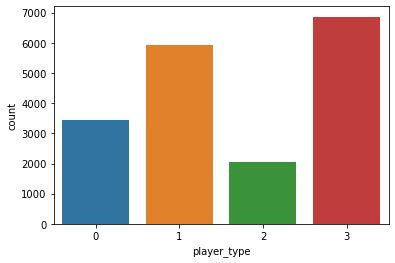

In [67]:
sns.countplot(new_df['player_type'])
plt.show()

From above, we can see that the player_type has been encoded as :

        0 - Attacker
        1 - Defender
        2 - Goalkeeper
        3 - Midfielder

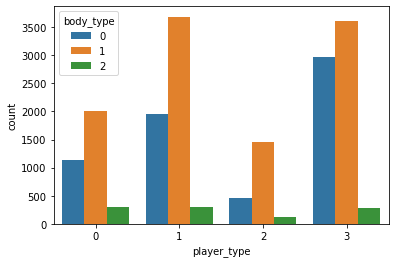

In [68]:
sns.countplot(new_df['player_type'],hue=new_df['body_type'])
plt.show()

# Implementing Logistic Regression

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x=new_df.drop('player_type',axis=1) #considering all independent variables
y=new_df['player_type']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logr=LogisticRegression()
logr.fit(x_train,y_train)
y_pred=logr.predict(x_test)    # will provide the prediction in binary classification for each row present in x_test
print(y_pred)

[3 2 3 ... 2 3 0]


In [73]:
np.set_printoptions(threshold=sys.maxsize)

In [74]:
print(y_pred)

[3 2 3 3 2 1 3 3 3 2 3 0 3 1 3 3 0 3 3 1 0 0 0 3 0 0 0 1 1 1 1 2 3 2 3 0 2
 3 3 3 1 3 0 3 1 0 1 1 0 1 0 1 1 3 1 2 1 3 1 3 3 1 0 3 2 0 2 3 1 1 1 1 1 3
 3 1 3 0 3 0 0 1 1 2 3 3 0 3 1 3 0 1 2 0 1 0 1 3 2 0 1 1 1 3 3 3 3 1 1 3 3
 3 2 2 0 3 1 0 0 2 3 3 3 3 3 3 3 1 1 0 2 3 3 0 3 3 3 1 2 3 3 3 1 1 1 3 3 0
 3 1 3 0 2 0 1 2 0 1 0 3 1 3 0 3 1 2 3 0 2 3 0 1 3 2 1 1 2 3 1 3 3 1 0 3 3
 3 2 0 3 1 3 2 3 1 3 1 2 2 3 2 3 2 3 1 1 3 1 0 0 0 1 1 3 1 3 3 1 2 3 1 1 3
 1 3 1 0 3 3 1 3 1 0 3 0 1 0 0 1 2 2 0 2 1 3 2 3 3 3 2 1 3 3 3 1 3 3 3 1 3
 1 3 3 1 0 1 0 0 3 1 1 0 0 1 1 3 0 1 0 3 0 0 1 2 2 3 1 0 1 3 3 3 1 3 2 3 3
 3 1 1 0 3 1 3 0 0 1 3 3 2 1 1 1 0 3 3 3 2 3 1 3 1 1 3 0 2 3 3 2 1 1 3 0 1
 1 1 1 3 0 2 1 3 3 1 0 0 2 0 3 2 0 0 1 3 3 3 1 2 1 1 2 1 3 1 3 0 1 3 2 1 2
 0 1 3 1 3 1 3 0 0 3 3 3 1 1 3 1 1 2 0 0 3 0 1 3 1 1 1 1 2 1 3 1 1 3 1 1 3
 1 3 1 3 3 2 3 1 3 3 1 0 1 3 1 1 3 0 3 2 3 2 3 3 0 1 1 3 0 0 3 3 3 1 1 3 3
 3 1 3 1 3 1 1 3 3 3 0 3 1 3 1 3 3 3 2 2 0 3 3 0 3 3 0 3 1 3 0 0 1 1 1 1 2
 1 3 1 0 1 1 3 2 3 1 1 2 

In [75]:
y_predicted=logr.predict_proba(x_test)
print(y_predicted)

[[0.11852363 0.00055248 0.         0.88092388]
 [0.00000006 0.00000001 0.99999908 0.00000085]
 [0.02917308 0.0009169  0.         0.96991002]
 [0.0041061  0.01497256 0.         0.98092134]
 [0.00000005 0.         0.99999976 0.0000002 ]
 [0.00004039 0.93625076 0.         0.06370886]
 [0.06915577 0.00080279 0.         0.93004144]
 [0.0075976  0.120892   0.00000004 0.87151036]
 [0.1451934  0.00068571 0.         0.85412088]
 [0.00000001 0.00000003 0.99999994 0.00000003]
 [0.07432738 0.00006902 0.         0.92560359]
 [0.86261607 0.00001766 0.         0.13736627]
 [0.26397066 0.00000471 0.         0.73602463]
 [0.00017781 0.97035114 0.         0.02947105]
 [0.4656146  0.01502125 0.         0.51936414]
 [0.05274877 0.00486599 0.         0.94238525]
 [0.99522653 0.00000361 0.         0.00476986]
 [0.00366205 0.04839816 0.         0.94793979]
 [0.19073291 0.00017001 0.00000001 0.80909708]
 [0.00038311 0.98117663 0.         0.01844026]
 [0.99728252 0.00000014 0.         0.00271735]
 [0.99401509 

In [76]:
print("Intercept : ",logr.intercept_)
print("Slope : ",logr.coef_)

Intercept :  [-0.00006107 -0.00007183  0.00011819  0.00001471]
Slope :  [[-0.01449136 -0.0137236  -0.00296453  0.00109583 -0.00039695  0.0007381
  -0.04842543  0.07524805  0.01488604  0.00202289  0.03277614  0.01805091
  -0.00180189 -0.01039033 -0.0170027   0.01862872 -0.00305553 -0.00649825
   0.00386226  0.01061416  0.00885464  0.01786011 -0.00795684  0.00554224
  -0.0036167   0.0193246   0.02284864 -0.02045904  0.05255628  0.01023459
   0.02228003  0.02032511 -0.02971209 -0.02225536 -0.03285435 -0.01756352
  -0.01202082 -0.00913506 -0.01414799 -0.01556273 -0.00417956 -0.00109009
  -0.0055716   0.00103634]
 [ 0.02704086 -0.00853696 -0.00334454  0.00019673 -0.00080294  0.00037665
   0.08777695 -0.03789833  0.0301521  -0.04835255 -0.01218807 -0.00844938
   0.0285704   0.01561571 -0.04082408 -0.02184117  0.01798674  0.03241536
   0.00078443 -0.01319551 -0.01418074 -0.01864446  0.01170438 -0.00661081
   0.00523105 -0.00814865 -0.02176476  0.04376767 -0.0084174  -0.06106551
  -0.0156211  

In [77]:
logr.score(x_test,y_test) #Returns the mean accuracy on the given test data and labels.

0.8955142231947484

# Confusion Matrix for multiple classes in target variable

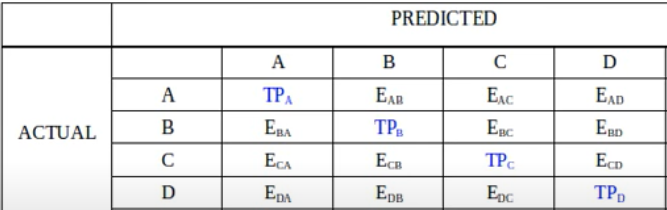

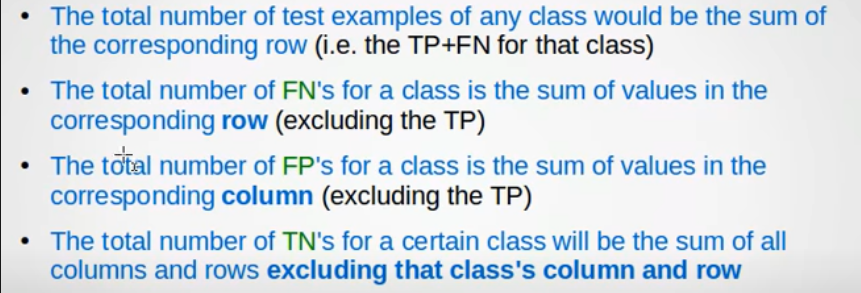

In [78]:
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix

In [79]:
confusion=confusion_matrix(y_test,y_pred)

In [80]:
print('Confusion Matrix :\n')
print(confusion)

Confusion Matrix :

[[ 844    3    0  165]
 [   1 1643    0  121]
 [   0    0  624    0]
 [ 145  138    0 1800]]


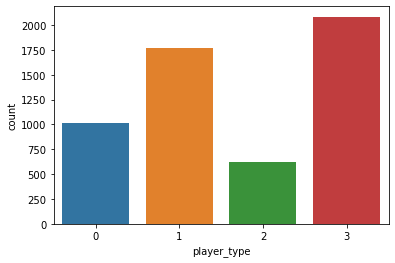

In [81]:
sns.countplot(y_test)
plt.show()

In [82]:
multilabel_confusion_matrix(y_test, y_pred,labels=[0,1,2,3])

array([[[4326,  146],
        [ 168,  844]],

       [[3578,  141],
        [ 122, 1643]],

       [[4860,    0],
        [   0,  624]],

       [[3115,  286],
        [ 283, 1800]]], dtype=int32)

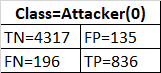

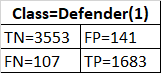

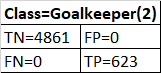

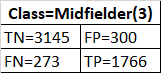

In [83]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [84]:
accuracy_score(y_test,y_pred)

0.8955142231947484

In [85]:
recall_score(y_test,y_pred,average='macro')

0.9072521359881096

In [86]:
precision_score(y_test,y_pred,average='macro')

0.909096217963442

In [87]:
f1_score(y_test,y_pred,average='macro')

0.9081419730394766

In [88]:
from sklearn.metrics import roc_auc_score

In [89]:
roc_auc_score(y_test,y_predicted,average='macro',multi_class='ovr')  

#We have used "y_predicted=logr.predict_proba(x_test)"
#as y_pred gave values (0,1,2,3) and using y_pred gave error "AxisError: axis 1 is out of bounds for array of dimension 1"
#y_pred is used in "Multilabel" classification whereas y_predicted is used in "Multiclass" classification in above function.

0.984202521974327

Multiclass classification : a fruit can be either an apple or a pear but not both at the same time.
    
Multilabel classification : A Document might be about any of religion, politics, finance or education 
                            at the same time or none of these.

In [90]:
from sklearn.metrics import roc_curve

In [91]:
#fpr,tpr,threshold=roc_curve(y_test,y_pred)  
#Note: The above function is restricted to ONLY binary classification task.

# Implementing Decision Tree

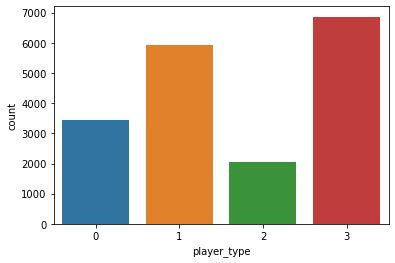

In [92]:
sns.countplot(new_df['player_type'])
plt.show()

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
from sklearn import tree    #importing tree to draw the decision tree
fig = plt.gcf()
fig.set_size_inches(150, 100)

<Figure size 10800x7200 with 0 Axes>

In [95]:
dt=DecisionTreeClassifier()    # default criterion = GINI index
dt.fit(x_train,y_train)
print("Decision Tree Score : ",dt.score(x_test,y_test))
print("Bias for Entropy : ",dt.score(x_train,y_train))

Decision Tree Score :  0.8282275711159738
Bias for Entropy :  1.0


[Text(144.53682434381702, 213.69103448275862, 'X[34] <= 48.5\ngini = 0.706\nsamples = 12794\nvalue = [2430, 4173, 1412, 4779]'),
 Text(70.32957464537502, 206.19310344827585, 'X[5] <= 1.5\ngini = 0.658\nsamples = 5901\nvalue = [2338, 38, 1412, 2113]'),
 Text(69.97475799678544, 198.6951724137931, 'gini = 0.0\nsamples = 1412\nvalue = [0, 0, 1412, 0]'),
 Text(70.6843912939646, 198.6951724137931, 'X[8] <= 54.5\ngini = 0.507\nsamples = 4489\nvalue = [2338, 38, 0, 2113]'),
 Text(20.14068498818089, 191.19724137931036, 'X[14] <= 43.5\ngini = 0.421\nsamples = 2326\nvalue = [638, 37, 0, 1651]'),
 Text(6.569652009041307, 183.69931034482758, 'X[34] <= 42.5\ngini = 0.477\nsamples = 334\nvalue = [225, 25, 0, 84]'),
 Text(4.379768006027538, 176.20137931034483, 'X[6] <= 41.5\ngini = 0.389\nsamples = 306\nvalue = [225, 0, 0, 81]'),
 Text(1.064449945768718, 168.70344827586206, 'X[7] <= 43.0\ngini = 0.101\nsamples = 131\nvalue = [124, 0, 0, 7]'),
 Text(0.7096332971791454, 161.2055172413793, 'gini = 0.0\ns

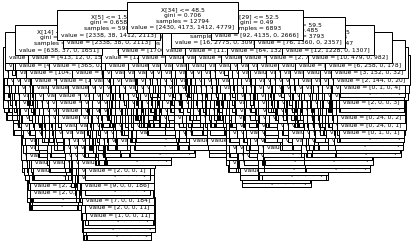

In [96]:
tree.plot_tree(dt.fit(x_train,y_train),fontsize=6)

In [97]:
dt1=DecisionTreeClassifier(criterion="entropy")    # using criterion as Entropy
dt1.fit(x_train,y_train)
print("Decision Tree Score : ",dt1.score(x_test,y_test))
print("Bias for Entropy : ",dt1.score(x_train,y_train))

Decision Tree Score :  0.8408096280087527
Bias for Entropy :  1.0


[Text(136.11981968028925, 213.0912, 'X[34] <= 47.5\nentropy = 1.864\nsamples = 12794\nvalue = [2430, 4173, 1412, 4779]'),
 Text(68.70903452023074, 204.3936, 'X[36] <= 32.0\nentropy = 1.585\nsamples = 5787\nvalue = [2325, 21, 1412, 2029]'),
 Text(68.27380540095874, 195.696, 'X[8] <= 54.5\nentropy = 1.036\nsamples = 4375\nvalue = [2325, 21, 0, 2029]'),
 Text(28.825003554598638, 186.9984, 'X[14] <= 46.5\nentropy = 0.927\nsamples = 2244\nvalue = [632, 20, 0, 1592]'),
 Text(12.030004874878129, 178.3008, 'X[34] <= 42.5\nentropy = 1.139\nsamples = 462\nvalue = [283, 17, 0, 162]'),
 Text(5.943597660058499, 169.60320000000002, 'X[6] <= 37.5\nentropy = 0.937\nsamples = 438\nvalue = [283, 0, 0, 155]'),
 Text(1.740916477088073, 160.9056, 'X[1] <= 172.5\nentropy = 0.138\nsamples = 103\nvalue = [101, 0, 0, 2]'),
 Text(1.3056873578160548, 152.208, 'X[35] <= 7.5\nentropy = 0.764\nsamples = 9\nvalue = [7, 0, 0, 2]'),
 Text(0.8704582385440365, 143.5104, 'X[36] <= 7.0\nentropy = 0.918\nsamples = 3\nvalue

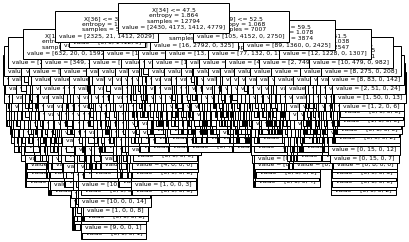

In [98]:
tree.plot_tree(dt1.fit(x_train,y_train),fontsize=6)

# Performing Pruning for both Gini and Entropy Decision Trees using max_depth

In [99]:
dt2=DecisionTreeClassifier(criterion="gini",max_depth=10)    # using criterion as gini and max_depth as 4
dt2.fit(x_train,y_train)
print("Decision Tree Score : ",dt2.score(x_test,y_test))
print("Bias : ",dt2.score(x_train,y_train))

Decision Tree Score :  0.8521152443471919
Bias :  0.9352040018758793


[Text(126.85319940476191, 207.55636363636364, 'X[34] <= 48.5\ngini = 0.706\nsamples = 12794\nvalue = [2430, 4173, 1412, 4779]'),
 Text(53.34583333333333, 187.7890909090909, 'X[36] <= 32.0\ngini = 0.658\nsamples = 5901\nvalue = [2338, 38, 1412, 2113]'),
 Text(52.75535714285714, 168.0218181818182, 'X[8] <= 54.5\ngini = 0.507\nsamples = 4489\nvalue = [2338, 38, 0, 2113]'),
 Text(21.29404761904762, 148.25454545454545, 'X[14] <= 43.5\ngini = 0.421\nsamples = 2326\nvalue = [638, 37, 0, 1651]'),
 Text(10.075000000000001, 128.48727272727274, 'X[34] <= 42.5\ngini = 0.477\nsamples = 334\nvalue = [225, 25, 0, 84]'),
 Text(6.716666666666667, 108.72, 'X[6] <= 41.5\ngini = 0.389\nsamples = 306\nvalue = [225, 0, 0, 81]'),
 Text(1.7714285714285714, 88.95272727272729, 'X[7] <= 43.0\ngini = 0.101\nsamples = 131\nvalue = [124, 0, 0, 7]'),
 Text(1.180952380952381, 69.18545454545455, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(2.361904761904762, 69.18545454545455, 'X[32] <= 10.5\ngini = 0.075\n

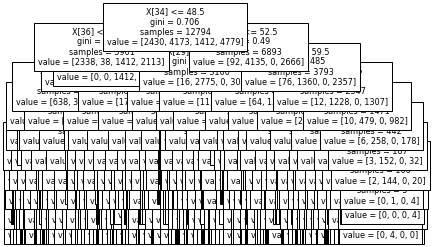

In [100]:
tree.plot_tree(dt2.fit(x_train,y_train),fontsize=8)

In [101]:
dt3=DecisionTreeClassifier(criterion="entropy",max_depth=10)    # using criterion as entropy and max_depth as 7
dt3.fit(x_train,y_train)
print("Decision Tree Score : ",dt3.score(x_test,y_test))
print("Bias : ",dt3.score(x_train,y_train))

Decision Tree Score :  0.862691466083151
Bias :  0.9311395966859466


[Text(124.2824091332712, 207.55636363636364, 'X[34] <= 47.5\nentropy = 1.864\nsamples = 12794\nvalue = [2430, 4173, 1412, 4779]'),
 Text(53.77510484622554, 187.7890909090909, 'X[35] <= 31.5\nentropy = 1.585\nsamples = 5787\nvalue = [2325, 21, 1412, 2029]'),
 Text(53.151060111835974, 168.0218181818182, 'X[8] <= 54.5\nentropy = 1.036\nsamples = 4375\nvalue = [2325, 21, 0, 2029]'),
 Text(22.15358807082945, 148.25454545454545, 'X[14] <= 46.5\nentropy = 0.927\nsamples = 2244\nvalue = [632, 20, 0, 1592]'),
 Text(10.920782851817334, 128.48727272727274, 'X[34] <= 42.5\nentropy = 1.139\nsamples = 462\nvalue = [283, 17, 0, 162]'),
 Text(5.928424976700839, 108.72, 'X[6] <= 37.5\nentropy = 0.937\nsamples = 438\nvalue = [283, 0, 0, 155]'),
 Text(2.496178937558248, 88.95272727272729, 'X[1] <= 172.5\nentropy = 0.138\nsamples = 103\nvalue = [101, 0, 0, 2]'),
 Text(1.8721342031686858, 69.18545454545455, 'X[7] <= 53.0\nentropy = 0.764\nsamples = 9\nvalue = [7, 0, 0, 2]'),
 Text(1.248089468779124, 49.418

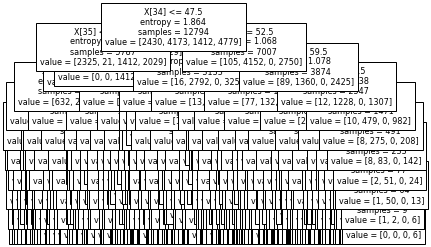

In [102]:
tree.plot_tree(dt3.fit(x_train,y_train),fontsize=8)

# Implementing ANOVA Feature Selection for Classification

In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [104]:
anova=SelectKBest(score_func=f_regression,k=22)
anova.fit(x_train,y_train)
x_train_anova=anova.transform(x_train)
x_test_anova=anova.transform(x_test)

In [105]:
scores_df = pd.DataFrame(anova.scores_)
columns_df = pd.DataFrame(x.columns)
featureScore_anova = pd.concat([columns_df, scores_df], axis=1)
featureScore_anova.columns = ['Feature Name', 'Score']
featureScore_anova

,Feature Name,Score
0,age,1.729522
1,height_cm,473.391917
2,weight_kg,516.716686
3,international_reputation,4.211144
4,weak_foot,24.795755
5,skill_moves,34.728173
6,attacking_crossing,157.708802
7,attacking_finishing,30.782723
8,attacking_heading_accuracy,1272.926587
9,attacking_short_passing,261.751018


In [106]:
featureScore_anova.sort_values("Score", ascending=False)

,Feature Name,Score
8,attacking_heading_accuracy,1272.926587
14,skill_long_passing,1181.969118
29,mentality_vision,1013.207777
24,power_strength,842.750441
22,power_jumping,546.717384
2,weight_kg,516.716686
1,height_cm,473.391917
13,skill_fk_accuracy,439.289613
20,movement_balance,273.547956
9,attacking_short_passing,261.751018


In [107]:
featureScore_anova.nlargest(22, "Score")

,Feature Name,Score
8,attacking_heading_accuracy,1272.926587
14,skill_long_passing,1181.969118
29,mentality_vision,1013.207777
24,power_strength,842.750441
22,power_jumping,546.717384
2,weight_kg,516.716686
1,height_cm,473.391917
13,skill_fk_accuracy,439.289613
20,movement_balance,273.547956
9,attacking_short_passing,261.751018


In [108]:
from sklearn.linear_model import LogisticRegression  

In [109]:
lr=LogisticRegression()
lr.fit(x_train_anova,y_train)
print("Bias of Logistic Regression after Annova test = ",lr.score(x_train_anova,y_train))
print("Variance of Logistic Regression after Annova test =",lr.score(x_test_anova,y_test))

Bias of Logistic Regression after Annova test =  0.8777551977489448
Variance of Logistic Regression after Annova test = 0.8798322392414296


# Implementing K-Nearest Neighbours

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test) 

0.8512035010940919

In [112]:
y_pred=knn.predict(x_test)   #to check probability scores received after classification of training data
y_pred

array([3, 2, 3, 3, 2, 1, 3, 3, 3, 2, 3, 0, 3, 1, 3, 3, 0, 3, 0, 1, 0, 0,
       0, 3, 0, 0, 0, 1, 1, 1, 1, 2, 3, 2, 3, 0, 2, 3, 3, 3, 1, 3, 3, 3,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 3, 1, 2, 3, 3, 3, 0, 3, 1, 0, 3, 2, 0,
       2, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 0, 3, 0, 0, 1, 1, 2, 0, 1, 3, 3,
       1, 0, 0, 1, 2, 0, 3, 0, 1, 3, 2, 0, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3,
       0, 3, 2, 2, 0, 3, 1, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 0, 2, 3,
       3, 3, 3, 1, 1, 1, 2, 3, 0, 3, 1, 1, 1, 0, 3, 0, 3, 3, 3, 0, 2, 0,
       1, 2, 0, 3, 3, 3, 1, 3, 0, 3, 1, 2, 1, 0, 2, 3, 0, 1, 3, 2, 1, 1,
       2, 3, 1, 3, 3, 3, 0, 3, 1, 3, 2, 0, 3, 1, 0, 2, 3, 3, 1, 3, 2, 2,
       3, 2, 3, 2, 3, 1, 1, 3, 3, 3, 0, 0, 1, 1, 3, 1, 3, 3, 1, 2, 3, 1,
       1, 3, 1, 3, 1, 0, 3, 3, 1, 3, 1, 0, 3, 0, 1, 0, 3, 1, 2, 2, 0, 2,
       1, 3, 2, 3, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 0,
       1, 0, 0, 3, 1, 3, 0, 0, 3, 3, 3, 3, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1,
       0, 1, 3, 3, 3, 1, 3, 2, 3, 3, 0, 3, 1, 0, 3,

In [113]:
tbl=pd.DataFrame(list(zip(y_test,y_pred)),columns=['y_observed','y_predicted'])
print(tbl)

      y_observed  y_predicted
0              3            3
1              2            2
2              3            3
3              3            3
4              2            2
...          ...          ...
5479           3            3
5480           1            1
5481           2            2
5482           3            3
5483           0            0

[5484 rows x 2 columns]


# Conclusion :

From the above, we can conclude that Logistic Regression model built using important features to classify samples as either 

"Attacker"/"Midfielder"/"Defender"/"Goalkeeper" gave us the most highest accruracy/recall/precision/f1 scores 

and therefore should be considered as the final classification model.